In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from Lib_Codes import *

### Linear Regression

In [2]:
data = load_data("Datasets\\linear_regression_train.csv")

print(f"data.shape: {data.shape}")

X, Y = break_data(data, target='last')

X_train, Y_train, X_test, Y_test, mew, sigma = train_test_split(X, Y, scaleit=True)
#model = LinearRegression(lr=0.1, n_iters=60, display="adv", lambda_=0.001)
model = LinearRegression(lr=0.1, n_iters=60, display="adv", lambda_=0)
model.fit(X_train, Y_train, X_test, Y_test)

data.shape: (48000, 27)
Assuming the last colum is the output column
Iteration is: 0, cost funciton is: 2534137.981982679
Iteration is: 1, cost funciton is: 2065456.735547274
Iteration is: 2, cost funciton is: 1685511.5922850794
Iteration is: 3, cost funciton is: 1377496.4903328032
Iteration is: 4, cost funciton is: 1127789.3834071106
Iteration is: 5, cost funciton is: 925348.8081235945
Iteration is: 6, cost funciton is: 761224.851752882
Iteration is: 7, cost funciton is: 628162.8247696126
Iteration is: 8, cost funciton is: 520282.0584444362
Iteration is: 9, cost funciton is: 432815.58252923493
Iteration is: 10, cost funciton is: 361899.1400744168
Iteration is: 11, cost funciton is: 304400.1857175634
Iteration is: 12, cost funciton is: 257779.28770803183
Iteration is: 13, cost funciton is: 219977.79131806784
Iteration is: 14, cost funciton is: 189326.7660056971
Iteration is: 15, cost funciton is: 164473.2024812468
Iteration is: 16, cost funciton is: 144320.19060862492
Iteration is: 17,

Plotting


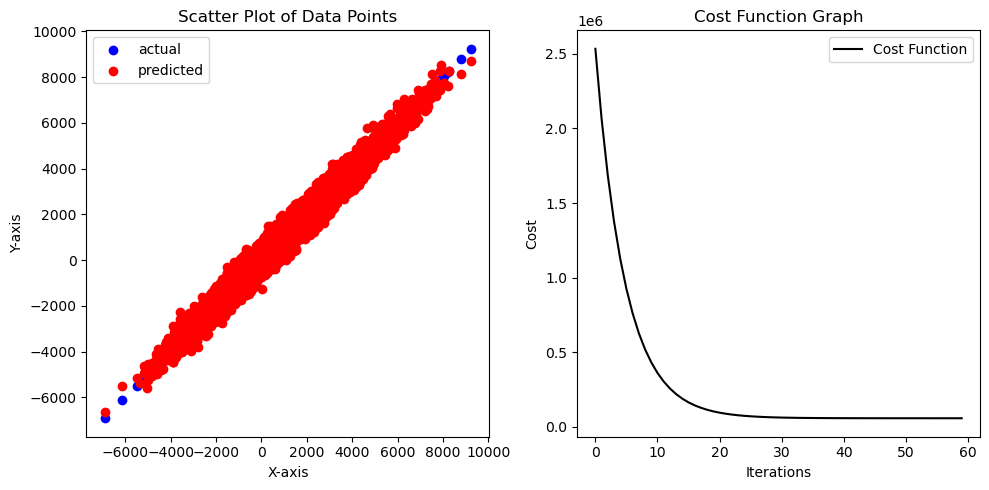

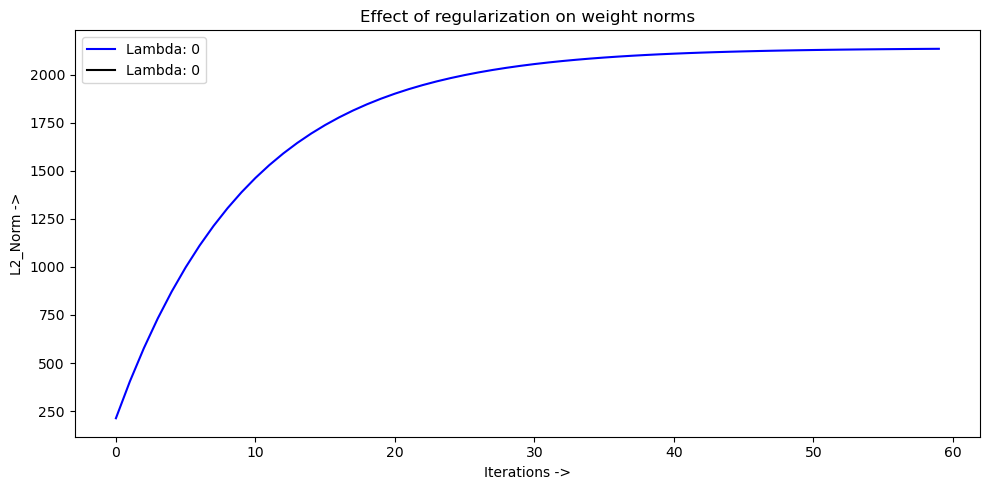

+===============+=============+
| Metric        | Value       |
+===============+=============+
| R^2           | 0.9745      |
| RMSE          | 242.2287    |
| MSE           | 58674.7316  |
| MAE           | 274.3525    |
+===============+=============+


In [3]:
model.plot_()
model.plot_l2_norm()

Y_pred = model.predict_(X_test)

#mse(Y_test, Y_pred) #prints mse from utils library , remembr this is mse between Y_pred and Y_test

#Printing of Metrics:

print("+===============+=============+")
print("| Metric        | Value       |")
print("+===============+=============+")
print(f"| R^2           | {r2_square(Y_test, Y_pred):<12.4f}|")
print(f"| RMSE          | {rmse(Y_test, Y_pred):<12.4f}|")
print(f"| MSE           | {mse(Y_test, Y_pred):<12.4f}|")
print(f"| MAE           | {mae(Y_test, Y_pred):<12.4f}|")
print("+===============+=============+")

In [3]:
#Predictions->

df1 = pd.read_csv("Datasets\\linear_regression_test.csv") #NO NEED OF SHUFFLING

data = np.array(df1.iloc[:])

X = break_data(data, has_id=True, target=None)

print(f'X.shape: {X.shape}')

X_scaled = (X - mew)/sigma

y_pred = model.predict_(X_scaled)

convert_to_csv(y_pred, "DataSets\\linear_result.csv")

#PREDICTIONS ARE IN Y_PRED

X.shape: (12000, 25)


## Logistic Regression for Binary Classification


In [5]:
data = load_data("Datasets/binary_classification_train.csv")

X, Y = break_data(data, target='last', has_id=True)

print(f"X.shape: {X.shape}, Y.shape: {Y.shape}")

X_train, Y_train, X_test, Y_test, meu, sigma = train_test_split(X, Y, scaleit=True)

model = LogisticRegression(lr=0.6, n_iters=150, display="adv")
model.fit(X_train, Y_train, X_test, Y_test)

Assuming the last colum is the output column
X.shape: (48000, 20), Y.shape: (48000,)
Iteration is: 0, cost funciton is: 0.5291141428890881
Execution time: 0.004494 seconds!!!
Execution time: 0.008361 seconds!!!
Execution time: 0.011381 seconds!!!
Execution time: 0.013253 seconds!!!
Execution time: 0.016901 seconds!!!
Execution time: 0.016901 seconds!!!
Execution time: 0.024233 seconds!!!
Execution time: 0.028211 seconds!!!
Execution time: 0.028211 seconds!!!
Execution time: 0.028211 seconds!!!
Iteration is: 10, cost funciton is: 0.291160593448753
Execution time: 0.028211 seconds!!!
Execution time: 0.028211 seconds!!!
Execution time: 0.044321 seconds!!!
Execution time: 0.044321 seconds!!!
Execution time: 0.044321 seconds!!!
Execution time: 0.057069 seconds!!!
Execution time: 0.060339 seconds!!!
Execution time: 0.060339 seconds!!!
Execution time: 0.064061 seconds!!!
Execution time: 0.064061 seconds!!!
Iteration is: 20, cost funciton is: 0.26302270884192275
Execution time: 0.064061 second

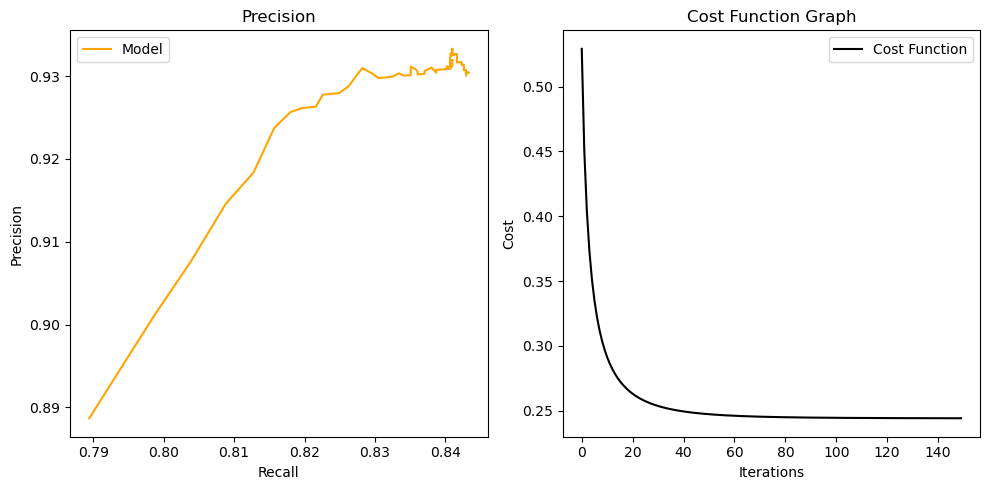

In [6]:
model.plot_()

Y_pred = np.array(model.predict_(X_test)) # just converting to numpy array

#COnverting idk wts wrng but have to convert it
Y_pred = np.array([1 if k > 0.5 else 0 for k in Y_pred])

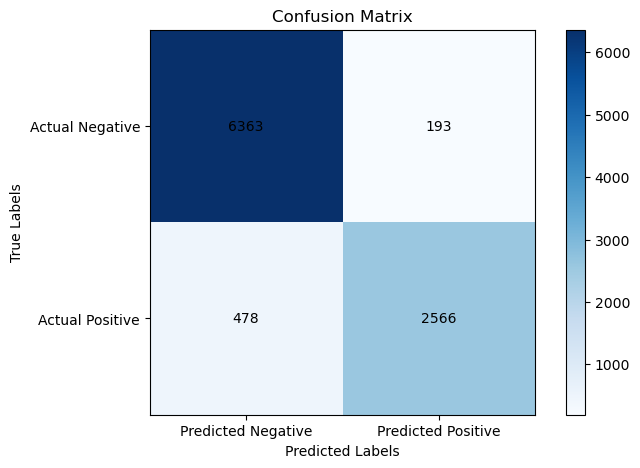

+===============+=============+
| Metric        | Value       |
+===============+=============+
| F1            | 0.8844      |
| Accuracy      | 0.9301      |
| Recall        | 0.8430      |
| Precision     | 0.9300      |
+===============+=============+


In [7]:
model.plot_confusion_matrix(Y_test, Y_pred)

#printt_log_details(Y_test, Y_pred)

print("+===============+=============+")
print("| Metric        | Value       |")
print("+===============+=============+")
print(f"| F1            | {f1(Y_test, Y_pred):<12.4f}|")
print(f"| Accuracy      | {accuracy_(Y_test, Y_pred):<12.4f}|")
print(f"| Recall        | {recall(Y_test, Y_pred):<12.4f}|")
print(f"| Precision     | {precision(Y_test, Y_pred):<12.4f}|")
print("+===============+=============+")

In [8]:
#Predictions:

df1 = pd.read_csv("Datasets\\binary_classification_test.csv")

data = np.array(df1.iloc[:])

X = break_data(data, has_id=True, target=None)

print(f'X.shape: {X.shape}')

X_scaled = (X - meu)/sigma

Y_pred = np.array(model.predict_(X_scaled)) # just converting to numpy array

#COnverting idk wts wrng but have to convert it
Y_pred = np.array([1 if k > 0.5 else 0 for k in Y_pred])

convert_to_csv(Y_pred, "DataSets\\log_binary_result.csv")

#PREDICTIONS ARE IN Y_PRED

X.shape: (12000, 20)


## Logistic Regression for Multi Classification

In [9]:
data = load_data("Datasets\\multi_classification_train.csv")

X, Y = break_data(data, target='last', has_id=True)

print(f"X.shape: {X.shape}, Y.shape: {Y.shape}")

X_train, y_train, X_test, y_test, meu, sigma = train_test_split(X, Y, test_size=0.2, scaleit=True)

model = MultiClassification(each_lr=0.5, each_iters=100, display='basic')
model.fit(X_train, y_train)
predictions = model.predict_(X_test)

Assuming the last colum is the output column
X.shape: (48000, 20), Y.shape: (48000,)
Uniques: [0. 1. 2. 3. 4.]
Execution time: 0.009602 seconds!!!
Execution time: 0.021444 seconds!!!
Execution time: 0.030429 seconds!!!
Execution time: 0.035473 seconds!!!
Execution time: 0.045623 seconds!!!
Execution time: 0.055304 seconds!!!
Execution time: 0.061416 seconds!!!
Execution time: 0.070943 seconds!!!
Execution time: 0.076884 seconds!!!
Execution time: 0.084593 seconds!!!
Execution time: 0.086595 seconds!!!
Execution time: 0.098408 seconds!!!
Execution time: 0.102921 seconds!!!
Execution time: 0.116152 seconds!!!
Execution time: 0.118155 seconds!!!
Execution time: 0.130173 seconds!!!
Execution time: 0.130173 seconds!!!
Execution time: 0.148293 seconds!!!
Execution time: 0.148293 seconds!!!
Execution time: 0.161999 seconds!!!
Execution time: 0.161999 seconds!!!
Execution time: 0.177774 seconds!!!
Execution time: 0.188132 seconds!!!
Execution time: 0.188132 seconds!!!
Execution time: 0.201981 

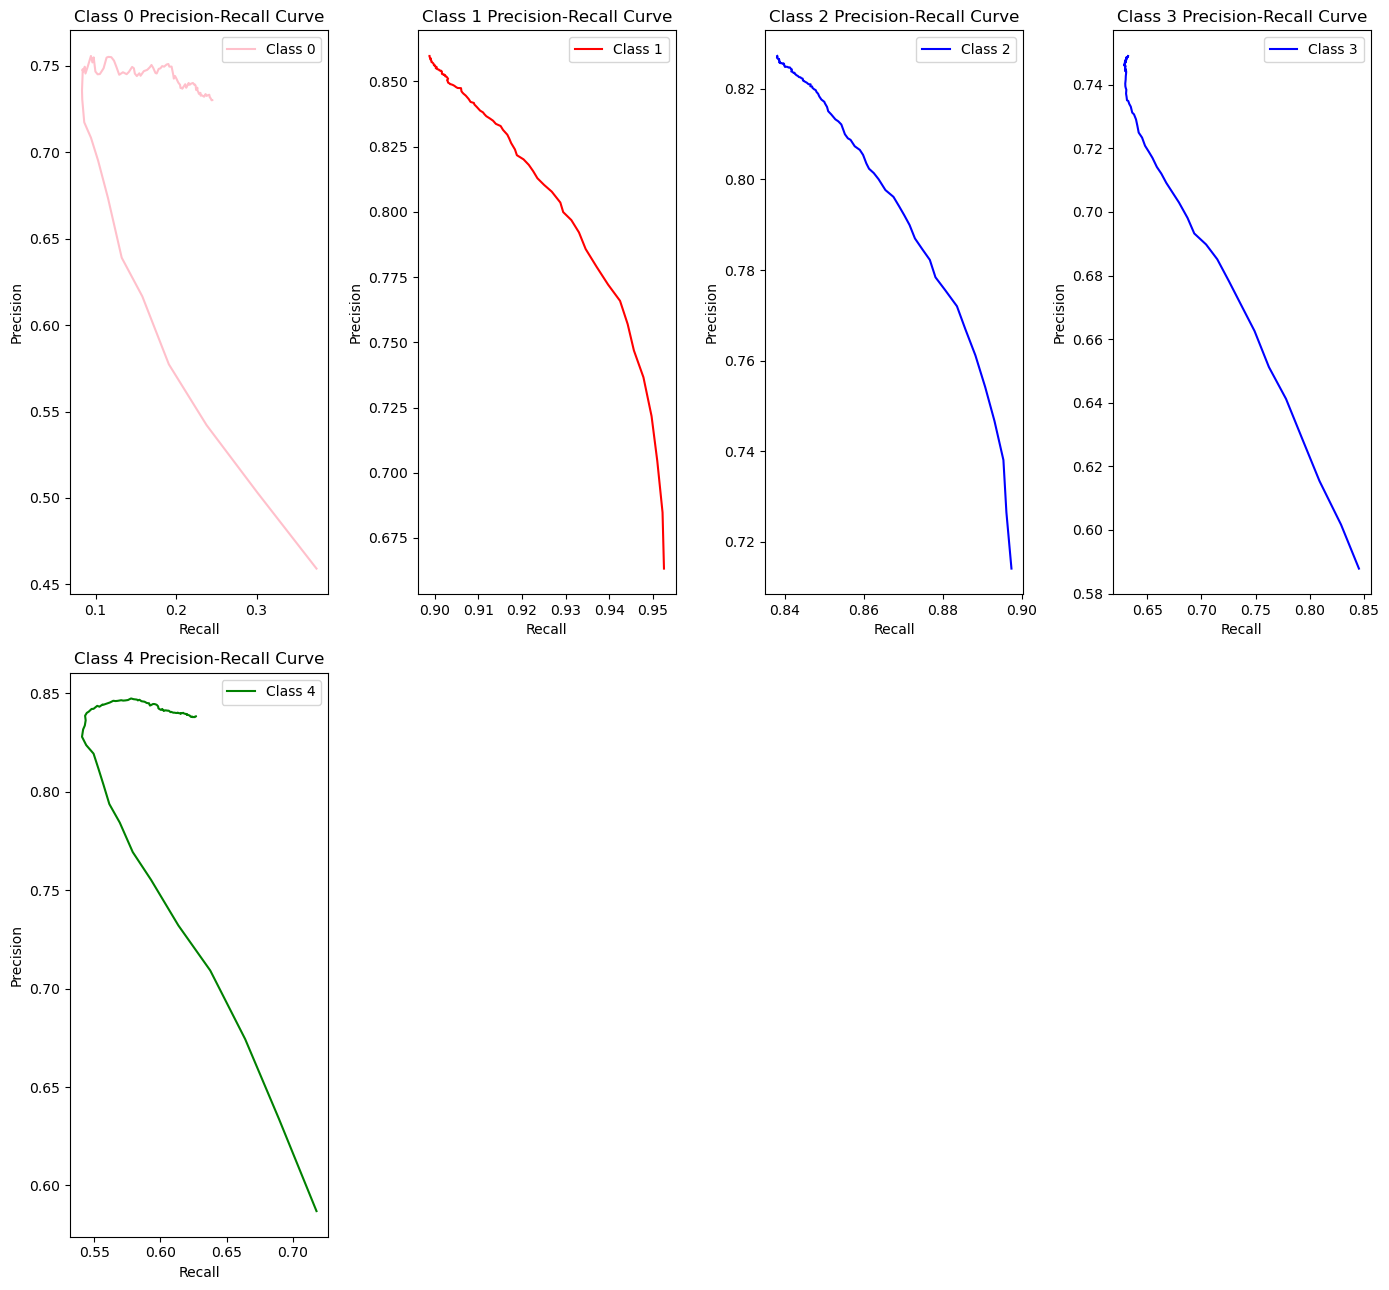

+===============+=============+
| Metric        | Value       |
+===============+=============+
| Accuracy      | 0.8256      |
+===============+=============+
| Recall        |-------------|
| Class 0       | 0.4093      |
| Class 1       | 0.9134      |
| Class 2       | 0.9199      |
| Class 3       | 0.8185      |
| Class 4       | 0.6827      |
+===============+=============+
| Precision     |-------------|
| Class 0       | 0.8667      |
| Class 1       | 0.8624      |
| Class 2       | 0.8412      |
| Class 3       | 0.7578      |
| Class 4       | 0.8122      |
+===============+=============+
| F1            |-------------|
| Class 0       | 0.5560      |
| Class 1       | 0.8872      |
| Class 2       | 0.8788      |
| Class 3       | 0.7870      |
| Class 4       | 0.7419      |
+===============+=============+


In [10]:
model.plot_precision_recall_curve()

#print_log_details(y_test, predictions)

print("+===============+=============+")
print("| Metric        | Value       |")
print("+===============+=============+")
print(f"| Accuracy      | {accuracy_(y_test, predictions):<12.4f}|")
print("+===============+=============+")

y_test = y_test.astype(int)
predictions = predictions.astype(int)

recall_list = recall_multi(y_test, predictions)

precision_list = precision_multi(y_test, predictions)
f1_list = f1_multi(y_test, predictions)


print(f"| Recall        |-------------|")
for i in range(len(recall_list)):
    print(f"| Class {i}       | {recall_list[i]:<12.4f}|")

print("+===============+=============+")
print(f"| Precision     |-------------|")

for i in range(len(recall_list)):
    print(f"| Class {i}       | {precision_list[i]:<12.4f}|")

print("+===============+=============+")
print(f"| F1            |-------------|")

for i in range(len(f1_list)):
    print(f"| Class {i}       | {f1_list[i]:<12.4f}|")

print("+===============+=============+")

In [11]:
#Predictions:

df1 = pd.read_csv("Datasets\\multi_classification_test.csv")

data = np.array(df1.iloc[:])

X = break_data(data, has_id=True, target=None)

print(f'X.shape: {X.shape}')

X_scaled = (X - meu)/sigma

y_pred = np.array(model.predict_(X_scaled)) # just converting to numpy array

convert_to_csv(y_pred, "DataSets\\log_multi_result.csv")

#PREDICTIONS ARE IN Y_PRED

X.shape: (12000, 20)


## K Means Clustering

X: (40000, 6)
data is converged
WCSS for K = 1: 232961.86142635994
Calculating for next K.......
data is converged
WCSS for K = 2: 161631.25146869896
Calculating for next K.......
data is converged
WCSS for K = 3: 118557.55236421224
Calculating for next K.......
data is converged
WCSS for K = 4: 76254.48675056144
Calculating for next K.......
data is converged
WCSS for K = 5: 29767.20470398068
Calculating for next K.......
data is converged
WCSS for K = 6: 29673.838906854075
Calculating for next K.......
data is converged
WCSS for K = 7: 5771.3312259328695
Calculating for next K.......
data is converged
WCSS for K = 8: 39275.633001042326
Calculating for next K.......
data is converged
WCSS for K = 9: 12069.29464707808
Calculating for next K.......
WCSS for K = 10: 5526.830843057107


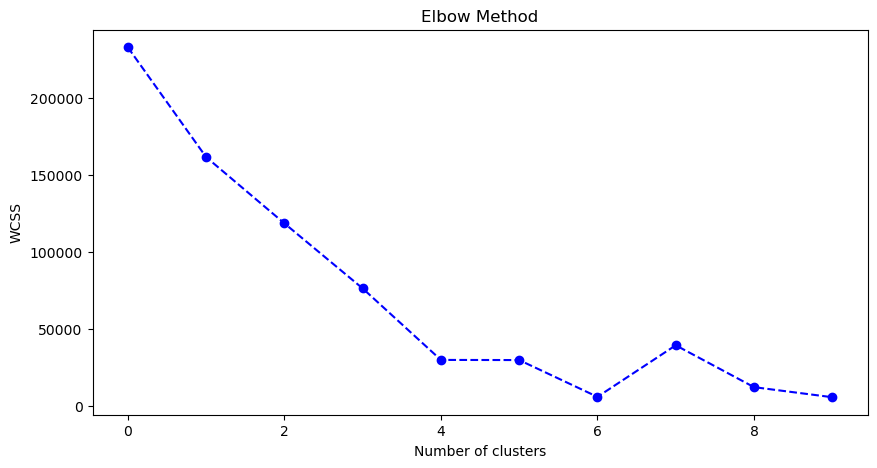

In [12]:
data = load_data("DataSets\\unsupervised_data.csv")

X = break_data(data, has_id=True, target=None) #removes ID

print(f"X: {X.shape}")

meu = np.mean(X)
sigma = np.std(X)
X = (X - meu)/sigma

run_elbow_test(X, max_k=10)  #RUN ELBOW TEST

In [4]:
model = KMeans(K = 6, max_iters=150, plot_graph=True)
y_pred = model.predict_(X)
print(f"WCSS: {model.WCSS}")
# if u want to exit click on terminal and press CTRL + C

In my 0th iter
In my 1th iter
In my 2th iter
In my 3th iter
In my 4th iter
In my 5th iter
In my 6th iter
In my 7th iter
In my 8th iter
In my 9th iter
In my 10th iter
In my 11th iter
In my 12th iter
In my 13th iter
In my 14th iter
In my 15th iter
In my 16th iter
In my 17th iter
In my 18th iter
In my 19th iter
In my 20th iter
In my 21th iter
In my 22th iter
In my 23th iter
In my 24th iter
In my 25th iter
In my 26th iter
In my 27th iter
In my 28th iter
In my 29th iter
In my 30th iter
In my 31th iter
In my 32th iter
In my 33th iter
In my 34th iter
In my 35th iter
In my 36th iter
In my 37th iter
In my 38th iter
In my 39th iter
In my 40th iter
In my 41th iter
In my 42th iter
In my 43th iter
In my 44th iter
In my 45th iter
In my 46th iter
In my 47th iter
In my 48th iter
In my 49th iter
In my 50th iter
In my 51th iter
In my 52th iter
In my 53th iter
In my 54th iter
In my 55th iter
In my 56th iter
In my 57th iter
In my 58th iter
In my 59th iter
In my 60th iter
In my 61th iter
In my 62th iter
In

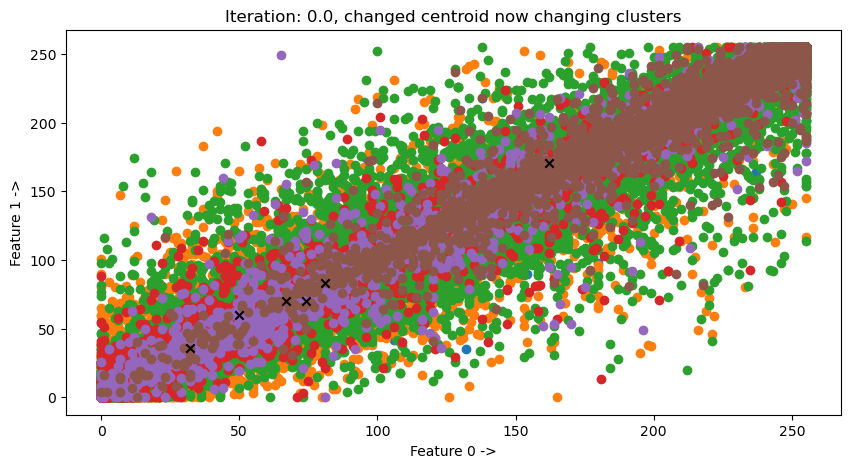

In [15]:
#NOTE these plots will look updated only if u run in vscode
model.plot_(0,1)

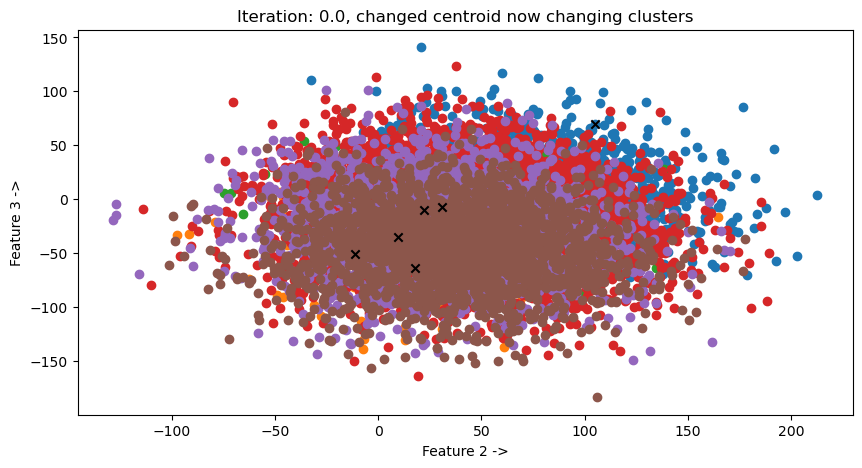

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
model.plot_(2,3)

## Neural Binary

In [41]:
df2 = pd.read_csv("Datasets/nn_train.csv")
df = df2.sample(frac=1, random_state=42).reset_index(drop=True) 

print("All are loaded")

data = np.array(df.iloc[:,:])

X = data[:,1:1025]
Y = data[:,1025]

Y = np.reshape(Y, (Y.shape[0], 1)) #only for binary to make it 2d matrix

meu = np.mean(X, axis=0)
sigma = np.std(X, axis=0) 
X_scaled = (X - meu) / sigma

print(f"Y.shape: {Y.shape}, X.shape: {X.shape}")
time1 = time.time()

#model = Neural(n_iters=152, lr=1e-4, error_function='binary_cross_entropy')
model = Neural(n_iters=120, lr=1e-4, error_function='binary_cross_entropy')

model.fit(X_scaled, Y, X_scaled, Y)
model.Sequential([
  Dense(50, 'relu'),
  Dense(5, 'relu'),
  Dense(1, 'sigmoid'),
])

model.train()

time2 = time.time()

print(f"Time taken: {(time2-time1)/60:.6f} minutes")

not_converted = model.predict(np.reshape(X_scaled[:], (X_scaled.shape[0], X_scaled.shape[1], 1)))
converted = [1 if i >= 0.5 else 0 for i in not_converted]
converted = np.reshape(np.array(converted), (len(converted),1) ) #NECESSARY COZ IT HAS TO BE NUMPY ARRAY AND SAME SIZR

y_actal = Y[:]
y_pred = converted

All are loaded
Y.shape: (80000, 1), X.shape: (80000, 1024)
Time taken: 257.136985 minutes


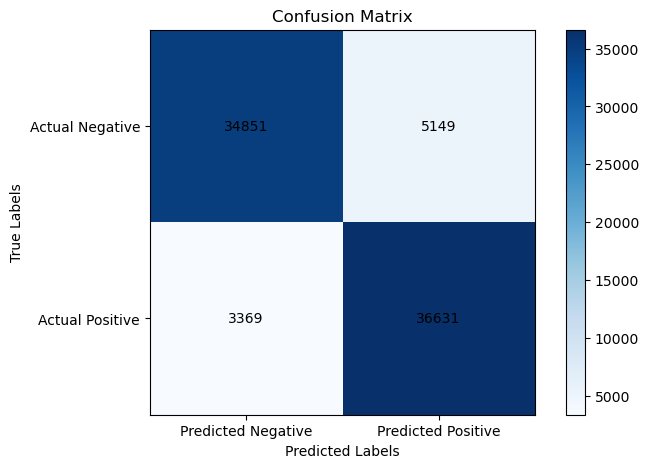

+===============+=============+
| Metric        | Value       |
+===============+=============+
| F1            | 0.8958      |
| Accuracy      | 0.8935      |
| Recall        | 0.9158      |
| Precision     | 0.8768      |
+===============+=============+
Ended


In [ ]:
#ploting the confusion matrix
plot_confusion_matrix(y_actal, y_pred)

#printing the metrics
#print_neural_binary(y_actal, y_pred)

print("+===============+=============+")
print("| Metric        | Value       |")
print("+===============+=============+")
print(f"| F1            | {f1(Y[:], converted):<12.4f}|")
print(f"| Accuracy      | {accuracy_(Y[:], converted):<12.4f}|")
print(f"| Recall        | {recall(Y[:], converted):<12.4f}|")
print(f"| Precision     | {precision(Y[:], converted):<12.4f}|")
print("+===============+=============+")
print(f"Ended")

In [ ]:
#Predictions:

df1 = pd.read_csv("DataSets\\nn_test.csv")

data = np.array(df1.iloc[:])

X = break_data(data, has_id=True, target=None)

print(f'X.shape: {X.shape}')

X_scaled = (X - meu)/sigma

not_converted = model.predict(np.reshape(X_scaled[:], (X_scaled.shape[0], X_scaled.shape[1], 1)))
converted = [1 if i >= 0.5 else 0 for i in not_converted]
converted = np.reshape(np.array(converted), (len(converted),1) ) #NECESSARY COZ IT HAS TO BE NUMPY ARRAY AND SAME SIZR

Y_pred = converted
Y_pred = Y_pred.flatten()
print(Y_pred)

convert_to_csv(Y_pred, "DataSets\\nn_binary_pred.csv")
#PREDICTIONS ARE IN Y_PRED

X.shape: (20000, 1024)
[0 0 0 ... 1 0 1]


## Neural Multiclassifiaction

In [47]:
df2 = pd.read_csv("DataSets\\nn_train.csv")
df = df2.sample(frac=1, random_state=42).reset_index(drop=True) 

print("All are loaded")

data = np.array(df.iloc[:,:])

X = data[:,1:1025]
Y = data[:,1026]

 #One Hot Encoding of y_test 

y_test_classes = int(max(Y)) + 1

one_hot_y = np.eye(y_test_classes)[Y]
#this includes the 0 wala column but our classes start from 1

one_hot_y = one_hot_y[:,1:] #removing the 0th column

meu = np.mean(X, axis=0)
sigma = np.std(X, axis=0) 
X_scaled = (X - meu) / sigma

print(f"Y.shape: {Y.shape}, X.shape: {X.shape}")

time1 = time.time()

#model = Neural(n_iters=152, lr=1e-4, error_function='binary_cross_entropy')
model = Neural(n_iters=50, lr=1e-4, error_function='binary_cross_entropy')

model.fit(X_scaled, one_hot_y, X_scaled, one_hot_y)
model.Sequential([
  Dense(30, 'relu'),
  Dense(10, 'sigmoid'),
])

model.train()

time2 = time.time()

print(f"Time taken: {(time2-time1)/60:.6f} minutes")

not_converted = model.predict(np.reshape(X_scaled[:], (X_scaled.shape[0], X_scaled.shape[1], 1)))

not_converted = np.reshape(not_converted, (not_converted.shape[0], not_converted.shape[1]))

print(f"not_converted: {not_converted.shape}")

#Converting back!
#example if our row is [0.5, 0.2, 0.3] then we will convert it to [1, 0, 0]
converted_to_classes = np.argmax(not_converted, axis=1) #this will give the index of the max value in each row

#since our classes start from 1, we need to add 1 to each value
converted_to_classes += 1

y_actual = Y[:]
y_pred = converted_to_classes

All are loaded
Y.shape: (80000,), X.shape: (80000, 1024)
Time taken: 19.387742 minutes
not_converted: (80000, 10)


In [49]:
print_neural_multi(y_actual, y_pred)

+===============+=============+
| Metric        | Value       |
+===============+=============+
| Accuracy      | 0.5202      |
+===============+=============+
| Recall        |-------------|
| Class 0       | 0.0000      |
+===============+=============+
| Precision     |-------------|
| Class 1       | 0.5144      |
+===============+=============+
| Precision     |-------------|
| Class 2       | 0.6534      |
+===============+=============+
| Precision     |-------------|
| Class 3       | 0.4635      |
+===============+=============+
| Precision     |-------------|
| Class 4       | 0.3837      |
+===============+=============+
| Precision     |-------------|
| Class 5       | 0.5389      |
+===============+=============+
| Precision     |-------------|
| Class 6       | 0.3520      |
+===============+=============+
| Precision     |-------------|
| Class 7       | 0.5505      |
+===============+=============+
| Precision     |-------------|
| Class 8       | 0.5279      |
+=======

In [51]:
#Predictions:

df1 = pd.read_csv("DataSets\\nn_test.csv")

data = np.array(df1.iloc[:])

X = break_data(data, has_id=True, target=None)

print(f'X.shape: {X.shape}')

X_scaled = (X - meu)/sigma

not_converted = model.predict(np.reshape(X_scaled[:], (X_scaled.shape[0], X_scaled.shape[1], 1)))

not_converted = np.reshape(not_converted, (not_converted.shape[0], not_converted.shape[1]))

print(f"not_converted: {not_converted.shape}")

#Converting back!
#example if our row is [0.5, 0.2, 0.3] then we will convert it to [1, 0, 0]
converted_to_classes = np.argmax(not_converted, axis=1) #this will give the index of the max value in each row

#since our classes start from 1, we need to add 1 to each value
converted_to_classes += 1

y_pred = converted_to_classes
y_pred = y_pred.flatten()

convert_to_csv(y_pred, "DataSets\\nn_multi_pred.csv")
#PREDICTIONS ARE IN Y_PRED

X.shape: (20000, 1024)
not_converted: (20000, 10)


## Polynomial Regression

In [12]:
data = load_data("DataSets\\polynomial_regression_train.csv")

X, Y = break_data(data, target='last', has_id=True)

print(f"X.shape: {X.shape}")

X = add_polynomial_features(X, degree=7, interactions=True)

X_train, Y_train, X_test, Y_test, meu, sigma = train_test_split(X, Y, scaleit=True)

model = LinearRegression(lr=4e-2, n_iters=200, display="adv", lambda_=0)
model.fit(X_train, Y_train, X_test, Y_test)

Assuming the last colum is the output column
X.shape: (48000, 5)
Iteration is: 0, cost funciton is: 3.401786467564449e-17
Iteration is: 1, cost funciton is: 2.6584484767157136e-17
Iteration is: 2, cost funciton is: 2.3533808269374413e-17
Iteration is: 3, cost funciton is: 2.2091629764076433e-17
Iteration is: 4, cost funciton is: 2.1293415380335627e-17
Iteration is: 5, cost funciton is: 2.0777989506333567e-17
Iteration is: 6, cost funciton is: 2.0400534098297357e-17
Iteration is: 7, cost funciton is: 2.0098575449259527e-17
Iteration is: 8, cost funciton is: 1.9842998469945127e-17
Iteration is: 9, cost funciton is: 1.961908332939867e-17
Iteration is: 10, cost funciton is: 1.941872207796281e-17
Iteration is: 11, cost funciton is: 1.9237037379421606e-17
Iteration is: 12, cost funciton is: 1.9070832759398918e-17
Iteration is: 13, cost funciton is: 1.8917845486726387e-17
Iteration is: 14, cost funciton is: 1.877636836916345e-17
Iteration is: 15, cost funciton is: 1.864504866808752e-17
Iterat

Plotting


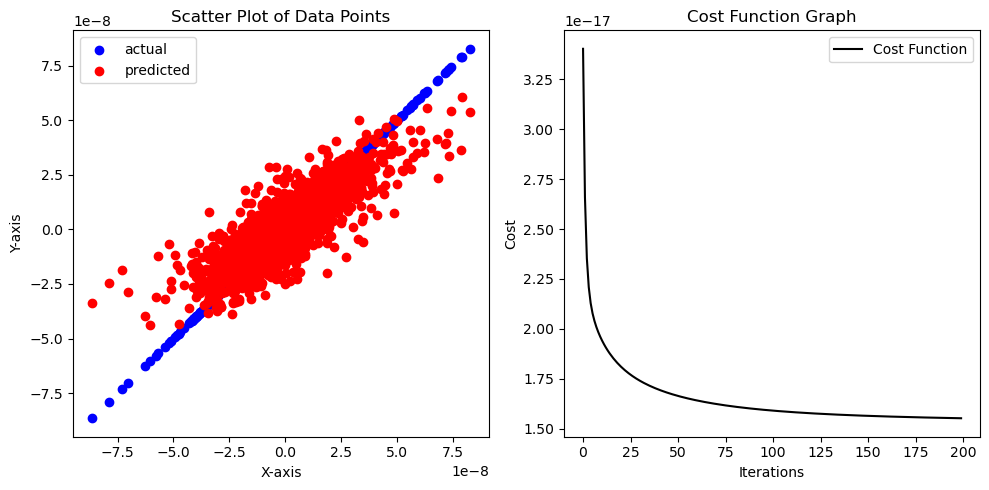

+===============+=============+
| Metric        | Value       |
+===============+=============+
| R^2           | 0.7167      |
+===============+=============+


In [13]:
model.plot_()

Y_pred = model.predict_(X_test)


print("+===============+=============+")
print("| Metric        | Value       |")
print("+===============+=============+")
print(f"| R^2           | {r2_square(Y_test, Y_pred):<12.4f}|")
print("+===============+=============+")

In [14]:
#Predictions->

df1 = pd.read_csv("Datasets\\polynomial_regression_test.csv")

data = np.array(df1.iloc[:])

X = break_data(data, has_id=True, target=None)

X = add_polynomial_features(X, degree=7, interactions=True)

print(f'X.shape: {X.shape}')

X_scaled = (X - meu)/sigma

y_pred = model.predict_(X_scaled)
convert_to_csv(y_pred, "DataSets\\poly_result.csv")

#PREDICTIONS ARE IN Y_PRED

X.shape: (12000, 445)


## KNN

X.shape: (569, 2), Y.shape: (569,)
Time taken: 3.695086 seconds
Accuracy: 0.37258347978910367


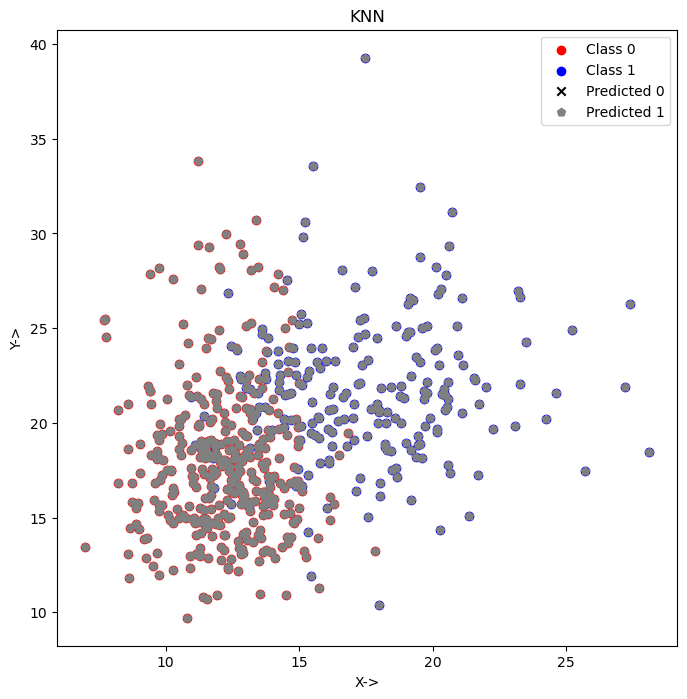

In [36]:
from sklearn.preprocessing import LabelEncoder

df2 = pd.read_csv("Datasets/KNNAlgorithmDataset.csv")
df = df2.sample(frac=1, random_state=42).reset_index(drop=True)
df["diagnosis"]

data = np.array(df.iloc[:,:])
le = LabelEncoder()
X = data[:,2:4].astype(float)
Y = le.fit_transform(data[:,1])

print(f"X.shape: {X.shape}, Y.shape: {Y.shape}")

meu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_scaled = (X - meu)/sigma

time1 = time.time()

model = KNN(k=2)
model.fit(X_scaled,Y)

y_pred = model.predict(X[:])

time2 = time.time()
print(f"Time taken: {time2-time1:.6f} seconds")

print(f"Accuracy: {accuracy_(Y[:], y_pred)}")

#Plotting all the stuffs

fig, ax = plt.subplots(1,1 , figsize=(8,8))

ax.scatter(X[Y==0,0], X[Y==0,1], color='red', label='Class 0')
ax.scatter(X[Y==1,0], X[Y==1,1], color='blue', label='Class 1')

#our points
ax.scatter(X[y_pred==0,0], X[y_pred==0,1], marker='x',color='black', label='Predicted 0')
ax.scatter(X[y_pred==1,0], X[y_pred==1,1], marker='p',color='grey', label='Predicted 1')

ax.legend()
ax.set_xlabel('X->')
ax.set_ylabel('Y->')
ax.set_title('KNN')
plt.show()

## Decision Trees

In [7]:
from sklearn.preprocessing import LabelEncoder
random.seed(1234)

df2 = pd.read_csv("Datasets/breast-cancer-dataset.csv")
df1 = df2.sample(frac=1, random_state=1234).reset_index(drop=True) #shuffling the data

data = np.array(df1.iloc[:])

X, y = break_data(data, has_id=False, target='last')
le = LabelEncoder()
y = le.fit_transform(y)

n_features = X.shape[1]

#ONE HOT ENCODING BASED ON MORE INFORMATION GAIN
hot_encode_continous_data(X, y, n_features)


X_train, y_train, X_test, y_test= train_test_split(
    X, y, test_size=0.2, scaleit=False
)

#If u dont sclae it it gives good accuracy

time1 = time.time()

clf = DecisionTree(max_depth=6)
clf.fit(X_train, y_train)

print(f"Running...")

predictions = clf.predict(X_test)

time2 = time.time()

Assuming the last colum is the output column
N features: 10
Running...


DONE
Time taken: 0.008574 seconds
+===============+=============+
| Metric        | Value       |
+===============+=============+
| F1            | 0.6875      |
| Accuracy      | 0.7674      |
| Recall        | 0.6471      |
| Precision     | 0.7333      |
+===============+=============+


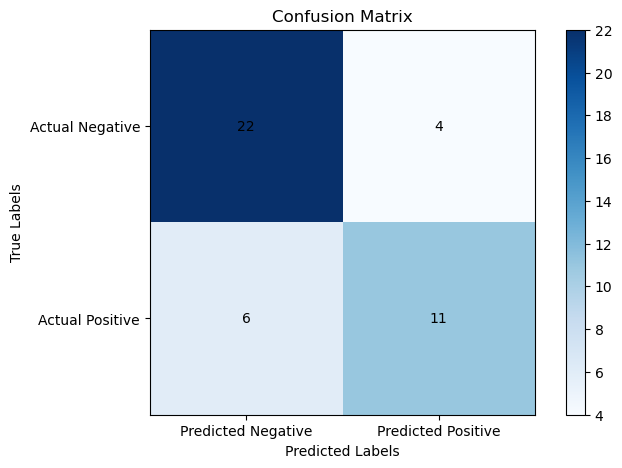

In [6]:
print(f"DONE")
print(f"Time taken: {time2-time1:.6f} seconds")

print("+===============+=============+")
print("| Metric        | Value       |")
print("+===============+=============+")
print(f"| F1            | {f1(y_test, predictions):<12.4f}|")
print(f"| Accuracy      | {accuracy_(y_test, predictions):<12.4f}|")
print(f"| Recall        | {recall(y_test, predictions):<12.4f}|")
print(f"| Precision     | {precision(y_test, predictions):<12.4f}|")
print("+===============+=============+")

plot_confusion_matrix(y_test, predictions)